# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [19]:
pip install PySimpleGUI


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [12]:
df = pd.read_csv('../resources/housing.csv')
df = df.dropna()
df.shape
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

print(df.dtypes)  


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [21]:
#df.corr()

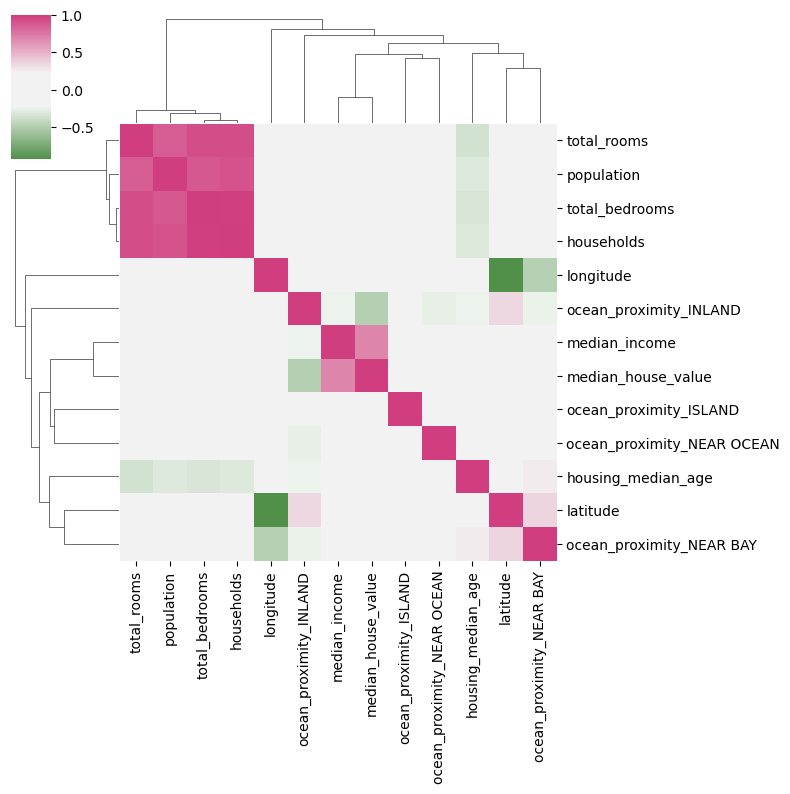

In [14]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)

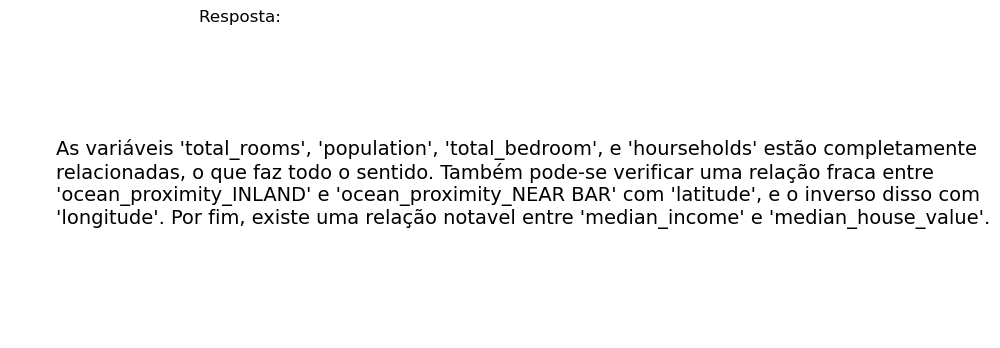

In [49]:
import matplotlib.pyplot as plt
import textwrap

# Exemplo de texto longo
texto = "As variáveis 'total_rooms', 'population', 'total_bedroom', e 'hourseholds' estão completamente relacionadas, o que faz todo o sentido. Também pode-se verificar uma relação fraca entre 'ocean_proximity_INLAND' e 'ocean_proximity_NEAR BAR' com 'latitude', e o inverso disso com 'longitude'. Por fim, existe uma relação notavel entre 'median_income' e 'median_house_value'."

# Usando textwrap para quebrar o texto
wrapped_text = textwrap.fill(texto, width=100)  # Define a largura da linha

# Criando um gráfico
plt.figure(figsize=(6, 4))
plt.text(0.1, 0.5, wrapped_text, ha='left', va='center', fontsize=14)
plt.axis('off')  # Remove os eixos
plt.title("Resposta: ")
plt.show()


### 3. Separe os dados em validação e teste

In [51]:
#3
y = df.median_house_value
X = df.drop('median_house_value',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [54]:
#4
# inicializando árvore
rgr1 = DecisionTreeRegressor(random_state=42, max_depth=8)
rgr2 = DecisionTreeRegressor(random_state=42, max_depth=2)

# Treinando modelo
rgr1.fit(X_train, y_train)
rgr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [55]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = rgr1.score(X_train, y_train)
mse2 = rgr2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(rgr1.get_depth(),mse1).replace(".",","))
print(template.format(rgr2.get_depth(),mse2).replace(".",","))


O MSE da árvore com profundidade=8 é: 0,76
O MSE da árvore com profundidade=2 é: 0,49


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

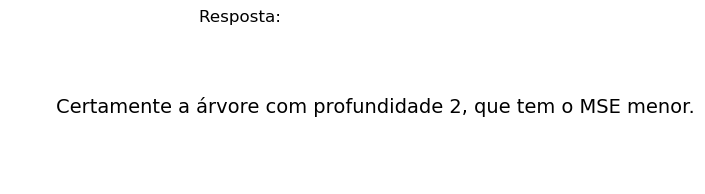

In [57]:
texto = "Certamente a árvore com profundidade 2, que tem o MSE menor."

# Usando textwrap para quebrar o texto
wrapped_text = textwrap.fill(texto, width=100)  # Define a largura da linha

# Criando um gráfico
plt.figure(figsize=(6, 2))
plt.text(0.1, 0.5, wrapped_text, ha='left', va='center', fontsize=14)
plt.axis('off')  # Remove os eixos
plt.title("Resposta: ")
plt.show()


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

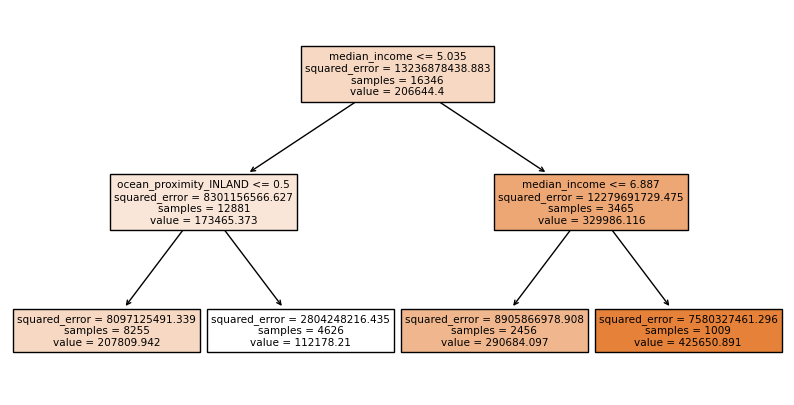

In [60]:
plt.rc('figure', figsize=(10, 5))
tp = tree.plot_tree(rgr2, 
                    feature_names=X.columns.tolist(),  
                    filled=True) 